<a href="https://colab.research.google.com/github/MrR8bot/MLandAI/blob/master/Asset_Model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Stock Price

In [1]:
pip install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install markupsafe==2.0.1



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [6]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

In [7]:
#Call function to get BTC historical data (It can be change to other Assets, e.g. ETH)
scraper = CmcScraper('ETH')

In [8]:
#Get dataframe
df = scraper.get_dataframe()

In [9]:
#Load the data set
#from google.colab import files
#files.upload()

Uncomment if want to do manual upload.

In [10]:
#Read in the data and store it into a variable
#asset = pd.read_csv('BTC-USD.csv')
#Show the data
#asset

In [11]:
#A variable for predicting 1 day out into the future
asset = df
future_days =1
#Create a new column (the target or dependant variable) shifted 'n' unit up, in this case n=1
asset['Future_Price'] = asset[['Close']].shift(-future_days)

#Choose the columns to keep
asset = asset[['Close','Future_Price']]

#Show the data
asset

,Close,Future_Price
0,1634.755043,1580.787953
1,1580.787953,1713.765203
2,1713.765203,1761.800027
3,1761.800027,1776.203754
4,1776.203754,1719.085451
...,...,...
2591,1.067860,0.708448
2592,0.708448,0.701897
2593,0.701897,0.753325
2594,0.753325,2.772120


In [12]:
#Make a copy of the data set

df = asset.copy()

#Create the independent data set

X = np.array(df[df.columns])

#Remove the last 'n' rows from the data set where 'n' is the future_Days=1
X = X[:len(asset)-future_days]

#Create the dependent data set (y) and convert the dataframe to a numpy array

y = np.array(df['Future_Price'])

#Get all the y values except for the last 'n; rows which is the future_Days =1

y = y[:-future_days]

#Split the data into a 85% training data set and a 15% testing data set

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state = 0, shuffle=False)


In [13]:
#Get the train data and transform it to a dataframe
train_data = pd.DataFrame(x_train, columns = df.columns)
#Show the first 7 rows of data

train_data.head(7)

,Close,Future_Price
0,1634.755043,1580.787953
1,1580.787953,1713.765203
2,1713.765203,1761.800027
3,1761.800027,1776.203754
4,1776.203754,1719.085451
5,1719.085451,1635.347657
6,1635.347657,1629.906375


In [14]:
#Get the test data and transfor into a dataframe
test_data = pd.DataFrame(x_test, columns = df.columns)

test_data.head(7)

,Close,Future_Price
0,11.6724,11.2289
1,11.2289,10.9838
2,10.9838,10.9293
3,10.9293,11.1482
4,11.1482,11.2954
5,11.2954,11.3574
6,11.3574,11.0360


In [15]:
#Initialize the setup
regression_setup = setup(data=train_data, target = 'Future_Price', session_id=123, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,Future_Price
2,Original Data,"(2205, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1543, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Future_Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Make sure that you hit enter when ask the question for complete the step.

In [16]:
# Train on all of the models and sort it by the R-squared metric aka (r2) and store the model with the best r2 score
best_model = compare_models(sort='r2')



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,34.9014,5.378770e+03,71.9409,0.9961,0.0690,0.0497,0.014
lasso,Lasso Regression,34.9015,5.378769e+03,71.9409,0.9961,0.0690,0.0497,0.026
ridge,Ridge Regression,34.9014,5.378770e+03,71.9409,0.9961,0.0690,0.0497,0.017
en,Elastic Net,34.9015,5.378770e+03,71.9409,0.9961,0.0690,0.0497,0.033
lar,Least Angle Regression,34.9014,5.378770e+03,71.9409,0.9961,0.0690,0.0497,0.021
omp,Orthogonal Matching Pursuit,34.9014,5.378770e+03,71.9409,0.9961,0.0690,0.0497,0.031
br,Bayesian Ridge,34.9018,5.378768e+03,71.9409,0.9961,0.0690,0.0497,0.024
huber,Huber Regressor,34.7367,5.383538e+03,71.9715,0.9961,0.0551,0.0386,0.059
gbr,Gradient Boosting Regressor,37.8821,6.023103e+03,76.5083,0.9957,0.0820,0.0581,0.106
lightgbm,Light Gradient Boosting Machine,38.8552,6.322283e+03,78.6599,0.9955,0.0617,0.0436,0.071


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


In [21]:
# The model with the higher R2 is the Selected Regresor
# Create the model and show its prediction metrics on the training data set
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.0234,11146.4131,105.5766,0.9927,0.0794,0.0548
1,36.3185,5951.0347,77.1430,0.9955,0.0554,0.0408
2,34.0890,3982.7957,63.1094,0.9974,0.0791,0.0593
3,39.1539,5012.6240,70.7999,0.9968,0.0664,0.0497
4,31.6986,4844.1909,69.6002,0.9961,0.0780,0.0572
5,35.3564,5776.2856,76.0019,0.9960,0.0653,0.0490
6,34.1175,4294.8486,65.5351,0.9969,0.0794,0.0495
7,21.5933,2079.2393,45.5987,0.9976,0.0616,0.0438
8,38.6475,5968.1841,77.2540,0.9959,0.0547,0.0411


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 5
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

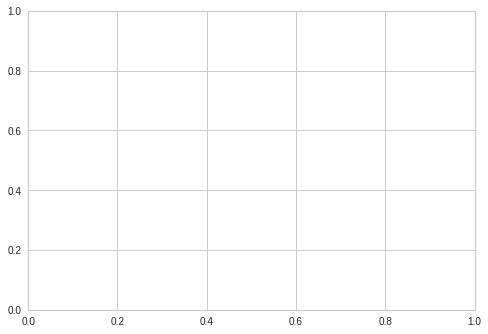

In [22]:
#Evaluate the model
evaluate_model(model)

In [23]:
#Get the predictions 
unseen_predictions = predict_model(model, data=test_data)
#Show the predictions
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.7795,3.4612,1.8604,0.8752,0.4495,0.9732


,Close,Future_Price,Label
0,11.672400,11.228900,13.379237
1,11.228900,10.983800,12.936807
2,10.983800,10.929300,12.692297
3,10.929300,11.148200,12.637929
4,11.148200,11.295400,12.856301
...,...,...,...
385,1.217440,1.067860,2.949490
386,1.067860,0.708448,2.800270
387,0.708448,0.701897,2.441725
388,0.701897,0.753325,2.435190


Diagram of Future Price versus Price

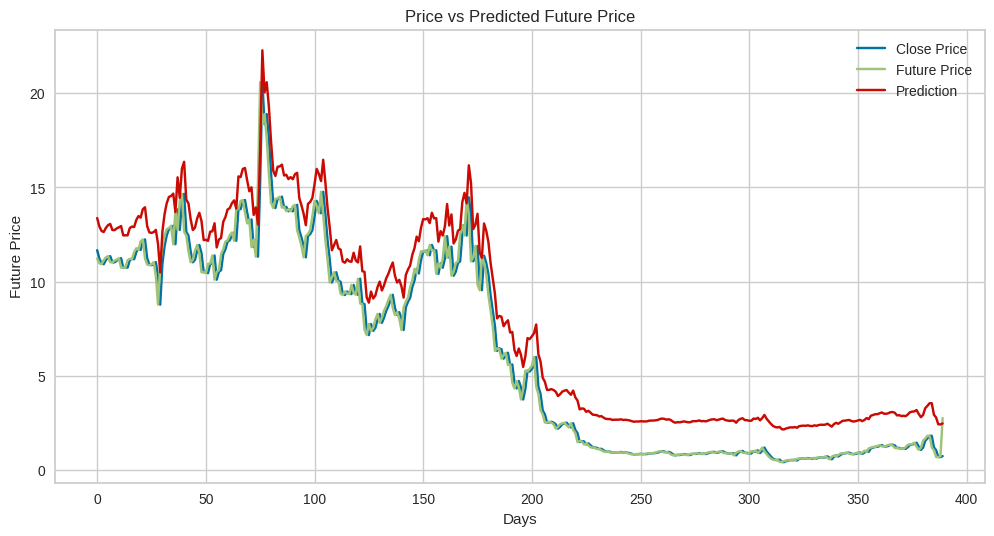

In [35]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(unseen_predictions['Close'], label="Close Price")
plt.plot(unseen_predictions['Future_Price'], label="Future Price")
plt.plot(unseen_predictions['Label'], label="Prediction")
plt.xlabel('Days')
plt.ylabel('Future Price')
plt.title('Price vs Predicted Future Price')
plt.legend()
plt.show()